# Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
print(L)
sum(L)

[0.72052863 0.48496567 0.11019526 0.2014673  0.22552757 0.47964909
 0.77432867 0.38055594 0.35561704 0.62949181 0.49725839 0.8143684
 0.10425988 0.08944527 0.9475839  0.87805252 0.4409056  0.43673609
 0.61552833 0.53520668 0.98696659 0.83898536 0.13270557 0.30093681
 0.3514726  0.74521341 0.92648891 0.73801231 0.53323479 0.27513944
 0.68189798 0.28565551 0.05279089 0.55480503 0.46258185 0.34909839
 0.288098   0.56283135 0.54164139 0.40098593 0.08004379 0.92326815
 0.49003844 0.90404304 0.40127965 0.02691587 0.10516453 0.41948576
 0.84001207 0.54067568 0.18042911 0.91324387 0.72708043 0.11785246
 0.78211696 0.09495956 0.512882   0.8948271  0.20358413 0.10498374
 0.57092087 0.95255953 0.73719113 0.79028232 0.91637865 0.21752724
 0.43482567 0.36839646 0.44257654 0.11012273 0.55164611 0.41911208
 0.84478193 0.62535146 0.0037566  0.76875274 0.32237779 0.20624048
 0.78284954 0.20032063 0.29974285 0.65483331 0.23898197 0.93486616
 0.91261811 0.58841212 0.28020071 0.18922237 0.1236572  0.79199

np.float64(48.77993352120939)

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [3]:
np.sum(L)

np.float64(48.77993352120939)

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [4]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

74.2 ms ± 6.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.08 ms ± 49.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [5]:
min(big_array), max(big_array)

(np.float64(1.0311431555276585e-06), np.float64(0.9999990021393328))

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [6]:
np.min(big_array), np.max(big_array)

(np.float64(1.0311431555276585e-06), np.float64(0.9999990021393328))

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

47.8 ms ± 941 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
476 μs ± 34.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

1.0311431555276585e-06 0.9999990021393328 499794.47262921004


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [9]:
M = np.random.random((3, 4))
print(M)


[[0.97343981 0.22537337 0.05916217 0.15331803]
 [0.30717416 0.21006403 0.54312808 0.7943258 ]
 [0.69893359 0.57367144 0.97181178 0.07159242]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [10]:
M.sum()

np.float64(5.581994694043031)

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [9]:
M.min(axis=0)

array([0.0132365 , 0.22493549, 0.62612948, 0.01944499])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [10]:
M.max(axis=1)

array([0.74453513, 0.89058026, 0.98251726])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

In [25]:
!pip install matplotlib
# !python -m bash_kernel.install

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/0c/89/9830ba00d88e43d15e53d64931e66b8792b46eb25e2050a88fec4a0df3d5/contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/b9/0a/a57caaff3bc880779317cb157e5b49dc47fad54effe027016abd355b0651/fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ---- -------------------------------- 20.5/167.0 kB 682.7 kB/s e

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python312\\share'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
! head -4 data/president_heights.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [12]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [13]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [14]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

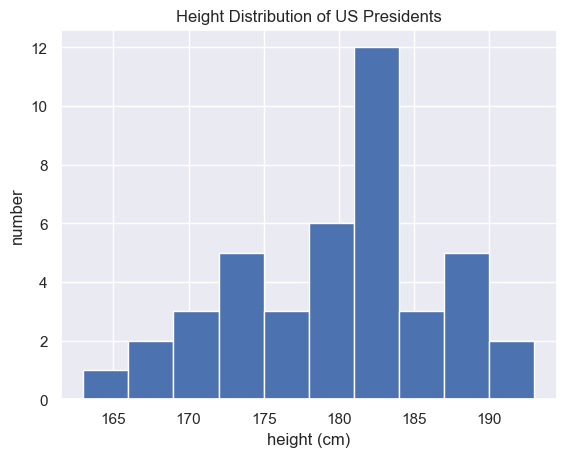

In [17]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.